# Eosinophil exploration

In [1]:
import scanpy as sc
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import squidpy as sq

import celltypist
from celltypist import models

from matplotlib import rcParams

In [2]:
adata = sc.read_h5ad("h5ad/xenium5k_scVI.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 646121 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample', 'graphclust', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'megagut_lvl3_predicted_labels', 'megagut_lvl3_over_clustering', 'megagut_lvl3_majority_voting', 'megagut_lvl3_conf_score', 'megagut_lvl1_predicted_labels', 'megagut_lvl1_over_clustering', 'megagut_lvl1_majority_voting', 'megagut_lvl1_conf_score', 'fibro_predicted_labels', 'fibro_over_clustering', 'fibro_majority_voting', 'fibro_conf_score', 'MF1_prob', 'MF2_prob', 'PC_prob', 'S1_prob', 'S2_prob', 'S3_prob', 'S3x_prob

In [13]:
adata.obs.annot_matthias[adata.obs.annot_matthias == 'unknown'] = pd.NA
adata.obs.annot_matthias = adata.obs.annot_matthias.cat.remove_categories('unknown')

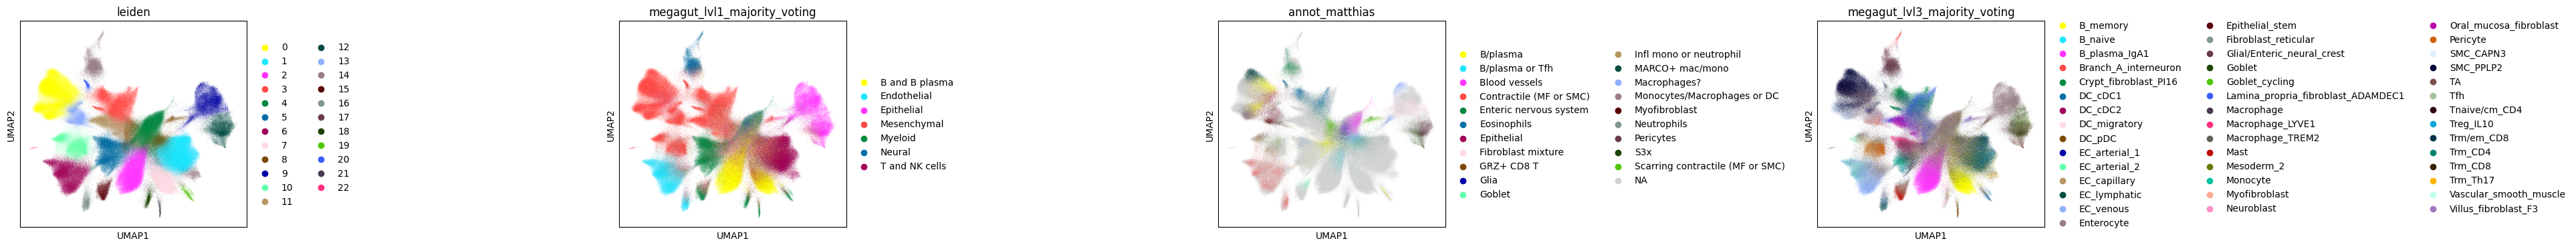

In [15]:
rcParams["figure.figsize"] = (4, 4)

sc.pl.umap(
    adata,
    color=[
         "leiden", "megagut_lvl1_majority_voting", "annot_matthias", "megagut_lvl3_majority_voting",
    ],
    wspace=1.4,
    #palette=sc.pl.palettes.default_28
    palette=sc.pl.palettes.default_102
    #palette=sc.pl.palettes.vega_20_scanpy
)

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning:

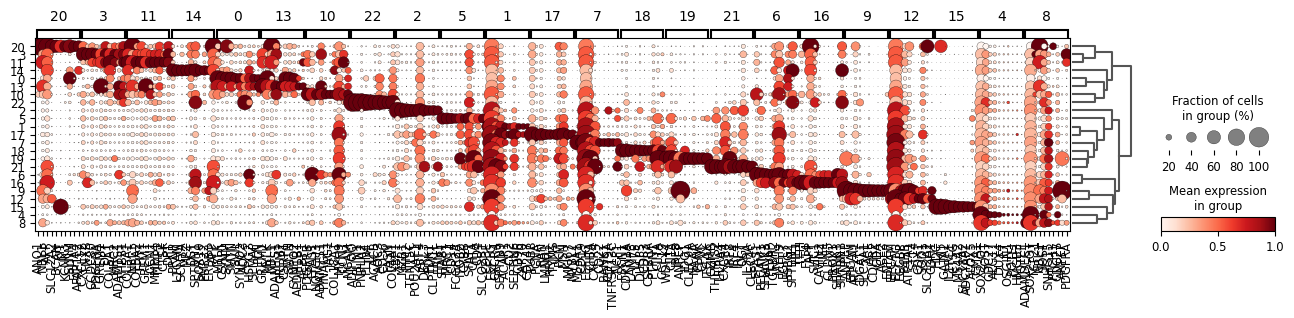

In [6]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Investigate markers of CellTypist labels
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon')

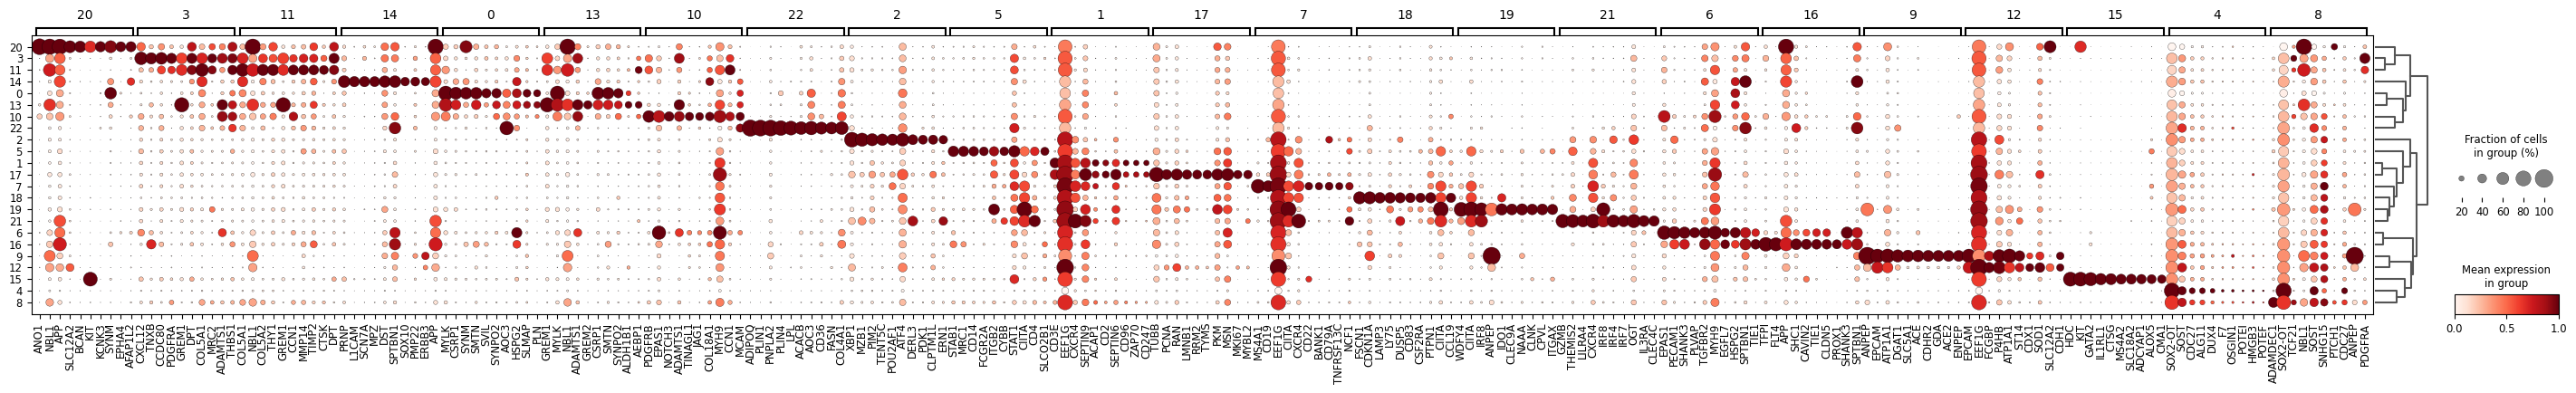

In [9]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby='leiden', standard_scale="var", n_genes=10, title="", figsize=(36, 4)
)